In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

### Download Turnstile Data by Datecode

In [40]:
# Creates dataframe from CSVs on MTA site based on URL-ending datecodes
def get_data(datecodes):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for datecode in datecodes:
        file_url = url.format(datecode)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
# Enter datecodes in YYMMDD format
datecodes = [170603, 170527, 160604, 160528, 150606, 150530]

turnstiles_df = get_data(datecodes)

In [50]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,6195217,2098317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,04:00:00,REGULAR,6195240,2098318
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,08:00:00,REGULAR,6195256,2098347
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,12:00:00,REGULAR,6195346,2098432
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,16:00:00,REGULAR,6195518,2098491


### Download Station Coordinates and Filter by Map Area

In order to target tech employees during their commute, we want to focus on the subway stops from 14th to 42nd Streets where many NYC tech firms have their offices.

In [99]:
stations = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

stations = stations[['Stop Name','Daytime Routes','GTFS Latitude', 'GTFS Longitude']]
stations.columns = ['STATION','LINENAME','LAT', 'LONG']
stations = stations[(stations.LAT >= 40.731191) & (stations.LAT <= 40.753512) &
                      (stations.LONG >= -74.001387) & (stations.LONG <= -73.977641)]

In [100]:
clean_stations = []
for station in stations.STATION:
    clean = station.upper() \
                     .replace(' - ','-') \
                     .replace('STATION', 'STA') \
                     .replace('GRAND CENTRAL-42 ST', 'GRD CNTRL-42 ST')
                
    clean_stations.append(clean)
    
clean_linenames = []
for linename in stations.LINENAME:
    clean = linename.replace(' ','')
    clean_linenames.append(clean)

stations.STATION = clean_stations
stations.LINENAME = clean_linenames

In [91]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,6195217,2098317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,04:00:00,REGULAR,6195240,2098318
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,08:00:00,REGULAR,6195256,2098347
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,12:00:00,REGULAR,6195346,2098432
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,16:00:00,REGULAR,6195518,2098491


In [117]:
df = pd.merge(turnstiles_df,stations,on='STATION')

In [118]:
df[['LINENAME_x','LINENAME_y']]

## Throw out rows where Y not in X

,LINENAME_x,LINENAME_y
0,BDFMNQRW,NQRW
1,BDFMNQRW,BDFM
2,BDFMNQRW,NQRW
3,BDFMNQRW,BDFM
4,BDFMNQRW,NQRW
5,BDFMNQRW,BDFM
6,BDFMNQRW,NQRW
7,BDFMNQRW,BDFM
8,BDFMNQRW,NQRW
9,BDFMNQRW,BDFM


In [8]:
turnstiles_df.columns = [column.strip() for column in df.columns]

NameError: name 'df' is not defined

In [9]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

turnstiles_df = turnstiles_df.sort_values("DATE_TIME", ascending = True)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Lat,Long,DATE_TIME
24900,N505,R022,02-00-07,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2015,00:00:00,REGULAR,56332530,8760275,40.749567,-73.987950,2015-05-23 00:00:00
25153,N505,R022,02-06-00,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2015,00:00:00,REGULAR,3502008,3520650,40.749719,-73.987823,2015-05-23 00:00:00
220534,R130,R321,01-00-01,18 ST,1,IRT,05/23/2015,00:00:00,REGULAR,513124,492240,40.741040,-73.997871,2015-05-23 00:00:00
25236,N505,R022,02-06-01,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2015,00:00:00,REGULAR,2684875,896582,40.749567,-73.987950,2015-05-23 00:00:00
25237,N505,R022,02-06-01,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2015,00:00:00,REGULAR,2684875,896582,40.749719,-73.987823,2015-05-23 00:00:00
220578,R130,R321,01-00-02,18 ST,1,IRT,05/23/2015,00:00:00,REGULAR,588263,1299536,40.741040,-73.997871,2015-05-23 00:00:00
220622,R130,R321,01-06-00,18 ST,1,IRT,05/23/2015,00:00:00,REGULAR,1812292,1968658,40.741040,-73.997871,2015-05-23 00:00:00
25320,N506,R022,00-00-00,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2015,00:00:00,REGULAR,3012055,4840498,40.749567,-73.987950,2015-05-23 00:00:00
25152,N505,R022,02-06-00,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2015,00:00:00,REGULAR,3502008,3520650,40.749567,-73.987950,2015-05-23 00:00:00
25321,N506,R022,00-00-00,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2015,00:00:00,REGULAR,3012055,4840498,40.749719,-73.987823,2015-05-23 00:00:00


In [10]:
turnstiles_df['DAYOFWEEK'] = turnstiles_df['DATE_TIME'].dt.dayofweek

df = turnstiles_df.sort_values(by=['DATE_TIME']).groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME', 'DATE', 'TIME', 'DAYOFWEEK'], as_index = False).ENTRIES.max()

entrydf = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.max()

entrydf['DAILY'] = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.max()['ENTRIES'] - df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.min()['ENTRIES']

entrydf = entrydf.drop(['ENTRIES'], axis = 1)

In [11]:
df = pd.merge(df, entrydf, on=['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])
df

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,DAYOFWEEK,ENTRIES,DAILY
0,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 00:00:00,05/23/2015,00:00:00,5,19944197,3093
1,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 04:00:00,05/23/2015,04:00:00,5,19944481,3093
2,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 08:00:00,05/23/2015,08:00:00,5,19944533,3093
3,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 12:00:00,05/23/2015,12:00:00,5,19944935,3093
4,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 16:00:00,05/23/2015,16:00:00,5,19945853,3093
5,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 20:00:00,05/23/2015,20:00:00,5,19947290,3093
6,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 00:00:00,05/24/2015,00:00:00,6,19948288,2574
7,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 04:00:00,05/24/2015,04:00:00,6,19948591,2574
8,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 08:00:00,05/24/2015,08:00:00,6,19948646,2574
9,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 12:00:00,05/24/2015,12:00:00,6,19948924,2574


In [12]:
dfshift = df.shift(1)

In [13]:
df['PREVDT'] = dfshift['DATE_TIME']
df['PREVENT'] = dfshift['ENTRIES']
df['PREVTIME'] = dfshift['TIME']
df['ENTRIESDIFF'] = df['ENTRIES'] - df['PREVENT']
df['TIMEDIFF'] = df['DATE_TIME'] - df['PREVDT']
df['ENTRYPROP'] = df['ENTRIESDIFF']/df['DAILY']

df

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,DAYOFWEEK,ENTRIES,DAILY,PREVDT,PREVENT,PREVTIME,ENTRIESDIFF,TIMEDIFF,ENTRYPROP
0,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 00:00:00,05/23/2015,00:00:00,5,19944197,3093,NaT,NaN,NaN,NaN,NaT,NaN
1,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 04:00:00,05/23/2015,04:00:00,5,19944481,3093,2015-05-23 00:00:00,19944197.0,00:00:00,284.0,04:00:00,0.091820
2,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 08:00:00,05/23/2015,08:00:00,5,19944533,3093,2015-05-23 04:00:00,19944481.0,04:00:00,52.0,04:00:00,0.016812
3,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 12:00:00,05/23/2015,12:00:00,5,19944935,3093,2015-05-23 08:00:00,19944533.0,08:00:00,402.0,04:00:00,0.129971
4,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 16:00:00,05/23/2015,16:00:00,5,19945853,3093,2015-05-23 12:00:00,19944935.0,12:00:00,918.0,04:00:00,0.296799
5,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 20:00:00,05/23/2015,20:00:00,5,19947290,3093,2015-05-23 16:00:00,19945853.0,16:00:00,1437.0,04:00:00,0.464597
6,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 00:00:00,05/24/2015,00:00:00,6,19948288,2574,2015-05-23 20:00:00,19947290.0,20:00:00,998.0,04:00:00,0.387723
7,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 04:00:00,05/24/2015,04:00:00,6,19948591,2574,2015-05-24 00:00:00,19948288.0,00:00:00,303.0,04:00:00,0.117716
8,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 08:00:00,05/24/2015,08:00:00,6,19948646,2574,2015-05-24 04:00:00,19948591.0,04:00:00,55.0,04:00:00,0.021368
9,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 12:00:00,05/24/2015,12:00:00,6,19948924,2574,2015-05-24 08:00:00,19948646.0,08:00:00,278.0,04:00:00,0.108003


In [14]:
df = df.drop(df.index[0])

In [15]:
df = df[(df['TIMEDIFF'] >= '3 hours') & (df['TIMEDIFF'] <= '5 hours')]

df.shape

(98544, 16)

In [16]:
# TIME DIFFERENCES
# KEEP THIS

t=df.groupby('TIMEDIFF')['ENTRIES'].count().reset_index().sort_values('ENTRIES', ascending = False)
t.head(10)

,TIMEDIFF,ENTRIES
54,04:00:00,98046
38,03:52:56,18
6,03:10:22,16
33,03:42:47,16
45,03:56:45,15
11,03:15:07,15
25,03:33:03,15
51,03:59:41,14
50,03:59:15,14
4,03:08:01,14


In [17]:
# get the 6 4-hour blocks
df.loc[(df['PREVTIME'] >= '00:00:00') & (df['TIME'] <= '06:00:00'), 'TIMEBLOCK'] = 'block1'
df.loc[(df['PREVTIME'] >= '04:00:00') & (df['TIME'] <= '10:00:00'), 'TIMEBLOCK'] = 'block2'
df.loc[(df['PREVTIME'] >= '08:00:00') & (df['TIME'] <= '14:00:00'), 'TIMEBLOCK'] = 'block3'
df.loc[(df['PREVTIME'] >= '12:00:00') & (df['TIME'] <= '18:00:00'), 'TIMEBLOCK'] = 'block4'
df.loc[(df['PREVTIME'] >= '16:00:00') & (df['TIME'] <= '22:00:00'), 'TIMEBLOCK'] = 'block5'
df.loc[(df['PREVTIME'] >= '20:00:00') & (df['TIME'] <= '02:00:00'), 'TIMEBLOCK'] = 'block6'

df

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,DAYOFWEEK,ENTRIES,DAILY,PREVDT,PREVENT,PREVTIME,ENTRIESDIFF,TIMEDIFF,ENTRYPROP,TIMEBLOCK
1,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 04:00:00,05/23/2015,04:00:00,5,19944481,3093,2015-05-23 00:00:00,19944197.0,00:00:00,284.0,04:00:00,0.091820,block1
2,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 08:00:00,05/23/2015,08:00:00,5,19944533,3093,2015-05-23 04:00:00,19944481.0,04:00:00,52.0,04:00:00,0.016812,block2
3,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 12:00:00,05/23/2015,12:00:00,5,19944935,3093,2015-05-23 08:00:00,19944533.0,08:00:00,402.0,04:00:00,0.129971,block3
4,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 16:00:00,05/23/2015,16:00:00,5,19945853,3093,2015-05-23 12:00:00,19944935.0,12:00:00,918.0,04:00:00,0.296799,block4
5,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-23 20:00:00,05/23/2015,20:00:00,5,19947290,3093,2015-05-23 16:00:00,19945853.0,16:00:00,1437.0,04:00:00,0.464597,block5
6,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 00:00:00,05/24/2015,00:00:00,6,19948288,2574,2015-05-23 20:00:00,19947290.0,20:00:00,998.0,04:00:00,0.387723,block6
7,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 04:00:00,05/24/2015,04:00:00,6,19948591,2574,2015-05-24 00:00:00,19948288.0,00:00:00,303.0,04:00:00,0.117716,block1
8,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 08:00:00,05/24/2015,08:00:00,6,19948646,2574,2015-05-24 04:00:00,19948591.0,04:00:00,55.0,04:00:00,0.021368,block2
9,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 12:00:00,05/24/2015,12:00:00,6,19948924,2574,2015-05-24 08:00:00,19948646.0,08:00:00,278.0,04:00:00,0.108003,block3
10,A022,R022,01-00-00,34 ST-HERALD SQ,2015-05-24 16:00:00,05/24/2015,16:00:00,6,19949675,2574,2015-05-24 12:00:00,19948924.0,12:00:00,751.0,04:00:00,0.291764,block4


In [18]:
df[df['TIMEBLOCK'].isnull()]

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,DAYOFWEEK,ENTRIES,DAILY,PREVDT,PREVENT,PREVTIME,ENTRIESDIFF,TIMEDIFF,ENTRYPROP,TIMEBLOCK


In [19]:
df.shape

(98544, 17)

In [20]:
df.sort_values('ENTRIESDIFF', ascending = False)

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,DAYOFWEEK,ENTRIES,DAILY,PREVDT,PREVENT,PREVTIME,ENTRIESDIFF,TIMEDIFF,ENTRYPROP,TIMEBLOCK
13465,A037,R170,05-00-00,14 ST-UNION SQ,2017-05-25 17:00:00,05/25/2017,17:00:00,3,589824,588132,2017-05-25 13:00:00,1.921000e+03,13:00:00,5.879030e+05,04:00:00,0.999611,block4
96617,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-22 20:00:00,05/22/2017,20:00:00,0,28718908,7718,2017-05-22 16:00:00,2.871472e+07,16:00:00,4.193000e+03,04:00:00,0.543275,block5
96623,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-23 20:00:00,05/23/2017,20:00:00,1,28729423,8658,2017-05-23 16:00:00,2.872525e+07,16:00:00,4.173000e+03,04:00:00,0.481982,block5
96629,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-24 20:00:00,05/24/2017,20:00:00,2,28740872,9764,2017-05-24 16:00:00,2.873682e+07,16:00:00,4.051000e+03,04:00:00,0.414891,block5
96664,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-30 20:00:00,05/30/2017,20:00:00,1,28777577,7804,2017-05-30 16:00:00,2.877356e+07,16:00:00,4.021000e+03,04:00:00,0.515249,block5
96670,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-31 20:00:00,05/31/2017,20:00:00,2,28786144,7886,2017-05-31 16:00:00,2.878224e+07,16:00:00,3.906000e+03,04:00:00,0.495308,block5
96635,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-05-25 20:00:00,05/25/2017,20:00:00,3,28749882,6978,2017-05-25 16:00:00,2.874604e+07,16:00:00,3.840000e+03,04:00:00,0.550301,block5
96263,R238,R046,00-03-00,GRD CNTRL-42 ST,2017-05-22 20:00:00,05/22/2017,20:00:00,0,13570665,6011,2017-05-22 16:00:00,1.356689e+07,16:00:00,3.775000e+03,04:00:00,0.628015,block5
96365,R238,R046,00-03-01,GRD CNTRL-42 ST,2016-05-25 20:00:00,05/25/2016,20:00:00,2,12604687,6512,2016-05-25 16:00:00,1.260092e+07,16:00:00,3.768000e+03,04:00:00,0.578624,block5
96269,R238,R046,00-03-00,GRD CNTRL-42 ST,2017-05-23 20:00:00,05/23/2017,20:00:00,1,13578318,6371,2017-05-23 16:00:00,1.357469e+07,16:00:00,3.627000e+03,04:00:00,0.569298,block5


In [21]:
dropkey = ((df["C/A"] == "A037") & 
(df["UNIT"] == "R170") & 
(df["SCP"] == "05-00-00") & 
(df["STATION"] == "14 ST-UNION SQ") &
(df["DATE"] == "05/25/2017"))

dropkey2 = ((df["C/A"] == "R238A") & 
(df["UNIT"] == "R046") & 
(df["SCP"] == "02-00-03") & 
(df["STATION"] == "GRD CNTRL-42 ST") &
(df["DATE"] == "05/23/2016"))

dropkey3 = (
    (df["C/A"] == "R241A") & 
    (df["UNIT"] == "R048") & 
    (df["SCP"] == "00-00-00") & 
    (df["STATION"] == "GRD CNTRL-42 ST") &
    ((df["DATE"] == "05/24/2017") ^ (df["DATE"] == "05/23/2017") ^ (df["DATE"] == "05/30/2017") ^ (df["DATE"] == "05/22/2017") ^ (df["DATE"] == "05/25/2017") ^ (df["DATE"] == "05/31/2017")))


droplist = df[dropkey].index.tolist()

droplist = droplist + df[dropkey2].index.tolist() + df[dropkey3].index.tolist()

In [22]:
df1 = df.drop(droplist)

df1.shape

(98496, 17)

In [23]:
df1 = df1[(df1['DAYOFWEEK'] != 5) & (df1['DAYOFWEEK'] != 6)]

In [24]:
t=df.groupby('ENTRIESDIFF')['C/A'].count().reset_index().sort_values('C/A', ascending = False)
t.tail(1)

,ENTRIESDIFF,C/A
2967,587903.0,1


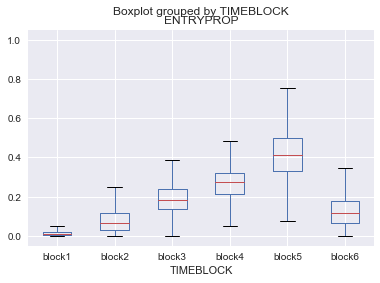

In [25]:
bdf = df1[(df1['ENTRYPROP'] >= 0) & (df1['ENTRYPROP'] <= 1)]

bdf.boxplot('ENTRYPROP', by='TIMEBLOCK')

In [50]:
df2 = df1[(df1['TIMEBLOCK'] == 'block4') ^ (df1['TIMEBLOCK'] == 'block5')].sort_values('ENTRIESDIFF', ascending = False)

money = df2.groupby(['TIMEBLOCK', 'STATION'], as_index = False).ENTRIESDIFF.sum()

money = money.sort_values('ENTRIESDIFF', ascending=False)

money['NAME'] = money['STATION'] + ' - ' + money['TIMEBLOCK']

In [54]:
money.EntriesNorm = money.ENTRIESDIFF/(money.ENTRIESDIFF.sum())

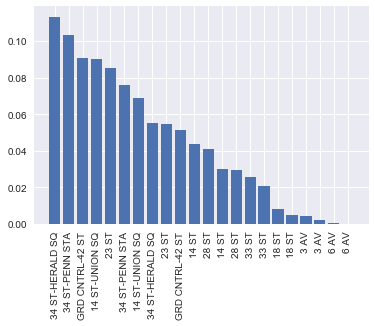

In [55]:
labels = [x for x in range(len(money.STATION))]
plt.bar(labels, money.EntriesNorm, align='center')
plt.xticks(labels, money.STATION, rotation='vertical')
plt.show()

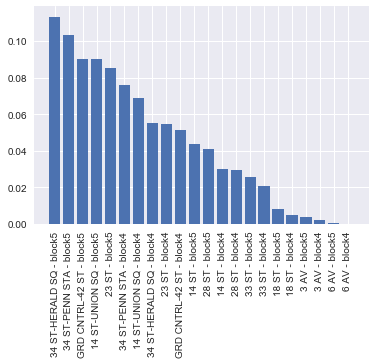

In [56]:
labels = [x for x in range(len(money.NAME))]
plt.bar(labels, money.EntriesNorm, align='center')
plt.xticks(labels, money.NAME, rotation='vertical')
plt.show()

In [65]:
'''
df.loc[(df['PREVTIME'] >= '00:00:00') & (df['TIME'] <= '06:00:00'), 'TIMEBLOCK'] = 'block1'
df.loc[(df['PREVTIME'] >= '04:00:00') & (df['TIME'] <= '10:00:00'), 'TIMEBLOCK'] = 'block2'
df.loc[(df['PREVTIME'] >= '08:00:00') & (df['TIME'] <= '14:00:00'), 'TIMEBLOCK'] = 'block3'
df.loc[(df['PREVTIME'] >= '12:00:00') & (df['TIME'] <= '18:00:00'), 'TIMEBLOCK'] = 'block4'
df.loc[(df['PREVTIME'] >= '16:00:00') & (df['TIME'] <= '22:00:00'), 'TIMEBLOCK'] = 'block5'
df.loc[(df['PREVTIME'] >= '20:00:00') & (df['TIME'] <= '02:00:00'), 'TIMEBLOCK'] = 'block6'
'''
# money['TIME_INTS'] = money.TIMEBLOCK
money.loc[money.TIMEBLOCK == 'block4', 'TIME_INTS'] = '12:00 PM - 6:00 PM'
money.loc[money.TIMEBLOCK == 'block5', 'TIME_INTS'] = '4:00 PM - 10:00 PM'


money

,TIMEBLOCK,STATION,ENTRIESDIFF,NAME,TIME_INTS
18,block5,34 ST-HERALD SQ,1392337.0,34 ST-HERALD SQ - block5,4:00 PM - 10:00 PM
19,block5,34 ST-PENN STA,1268702.0,34 ST-PENN STA - block5,4:00 PM - 10:00 PM
21,block5,GRD CNTRL-42 ST,1111903.0,GRD CNTRL-42 ST - block5,4:00 PM - 10:00 PM
12,block5,14 ST-UNION SQ,1109225.0,14 ST-UNION SQ - block5,4:00 PM - 10:00 PM
14,block5,23 ST,1050194.0,23 ST - block5,4:00 PM - 10:00 PM
8,block4,34 ST-PENN STA,932669.0,34 ST-PENN STA - block4,12:00 PM - 6:00 PM
1,block4,14 ST-UNION SQ,848125.0,14 ST-UNION SQ - block4,12:00 PM - 6:00 PM
7,block4,34 ST-HERALD SQ,678881.0,34 ST-HERALD SQ - block4,12:00 PM - 6:00 PM
3,block4,23 ST,673307.0,23 ST - block4,12:00 PM - 6:00 PM
10,block4,GRD CNTRL-42 ST,628437.0,GRD CNTRL-42 ST - block4,12:00 PM - 6:00 PM


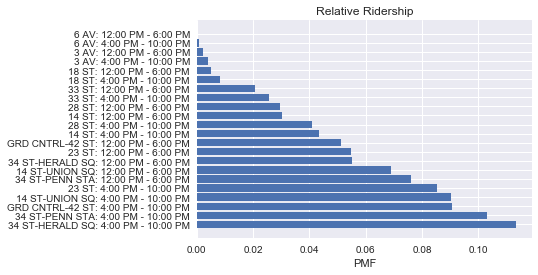

In [80]:
money.NAME = money.STATION + ': ' + money.TIME_INTS
plt.barh(labels, money.EntriesNorm, align='center')
plt.yticks(labels, money.NAME) #, rotation='vertical')
plt.xlabel("PMF")
plt.title("Relative Ridership")
plt.show()

In [ ]:
t=df2.groupby('STATION')['C/A'].count().reset_index().sort_values('C/A', ascending = False)
t.tail(10)